In [1]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.misc
from scipy import ndimage
import matplotlib.pyplot as plt

In [2]:
# dx = 0.1e-6
# dy = 0.1e-6
dz = 1e-9
dt = 1e-15

In [3]:
start_t = 0
stop_t = 1e-12

## Simetría X,Y
# start_x = -10e-6
# stop_x = 10e-6
# start_y = -10e-6
# stop_y = 10e-6

start_z = 0
stop_z = 500e-9

# x = np.linspace(start_x,stop_x,int(round((stop_x-start_x)/dx)))
# y = np.linspace(start_y,stop_y,int(round((stop_y-start_y)/dy)))
z = np.linspace(start_z,stop_z,abs(int(round((stop_z-start_z)/dz))))
t = np.linspace(start_t,stop_t,int(round((stop_t-start_t)/dt)))


tt, zz = np.meshgrid(t,z)

In [4]:
ke = 235 # J/(mK s)
k = 134.5 # J /(m^3 k^2)
G = 5.69e17 # J /(m^3 K s)
Cl = 2.42e6  # J /(m^3 K)
R = 0.88 # A.U.
delta = 20e-9 # nm
ball_len = 100e-9 # nm
T0 = 300 # K
tp = 100e-15 # fs
w0 = 12.4e-6 # um

## Distancia de Rayleigh
n = 1 # Coef Refl Aire
wavelength = 1032e-9 # nm
Zr = n*np.pi* w0**2 / wavelength
F = 2 # J /cm**2

x0 = 0 # Posición central del Spot en x
y0 = 0 # Posición central del Spot en y

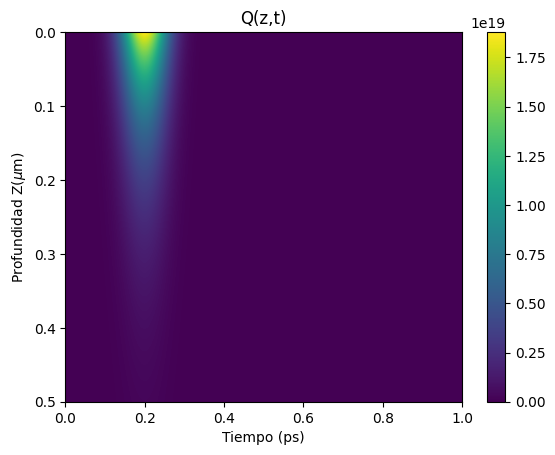

In [14]:
# Obtenemos el Valor T(t)
w = w0 * (1 + zz**2/Zr**2)**0.5
T = (1/tp) * (4*np.log(2)/np.pi)**0.5 * np.exp(-4*np.log(2)*((tt-2*tp)/tp)**2)
S = (1-R)/ (delta + ball_len) * F * w0**2/w**2 * np.exp(
    -zz/(delta + ball_len))
Q = T*S
plt.imshow(Q,extent = [t[0]*1e12,t[-1]*1e12,z[-1]*1e6,z[0]*1e6],aspect = 'auto')
plt.title("Q(z,t)")
plt.xlabel(r"Tiempo (ps)")
plt.ylabel("Profundidad Z($\mu$m)")
cbar = plt.colorbar(cmap='jet')
# cbar.set_label('Q(z,t)', rotation=90)
plt.show()